3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?

H0: MEAN(R_AMD) > MEAN(R_INTC)

HA: MEAN(R_AMD) < MEAN(R_INTC)

...

H0: MEAN(R_AMD) - MEAN(R_INTC) = 0

HA: MEAN(R_AMD) - MEAN(R_INTC) <> 0

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import math 
INTC = pdr.get_data_yahoo('INTC',
start="01/01/2019", interval="m")
INTC["r"]= (np.log(INTC["Adj Close"]) - np.log(INTC["Adj Close"].shift(1)))
AMD = pdr.get_data_yahoo('AMD',
start="01/01/2019", interval="m")
AMD["r"]= (np.log(AMD["Adj Close"]) - np.log(AMD["Adj Close"].shift(1)))
N=45

In [3]:
print(AMD.head())

                 High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2019-01-01  25.139999  16.940001  18.010000  24.410000  2311913200  24.410000   
2019-02-01  25.520000  22.270000  24.610001  23.530001  1301360800  23.530001   
2019-03-01  28.110001  21.040001  23.969999  25.520000  1499160400  25.520000   
2019-04-01  29.950001  25.830000  26.420000  27.629999  1275793800  27.629999   
2019-05-01  29.670000  26.030001  28.950001  27.410000  1675142900  27.410000   

                   r  
Date                  
2019-01-01       NaN  
2019-02-01 -0.036717  
2019-03-01  0.081186  
2019-04-01  0.079440  
2019-05-01 -0.007994  


In [4]:
print(INTC.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2019-01-01 to 2022-08-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       45 non-null     float64
 1   Low        45 non-null     float64
 2   Open       45 non-null     float64
 3   Close      45 non-null     float64
 4   Volume     45 non-null     float64
 5   Adj Close  45 non-null     float64
 6   r          44 non-null     float64
dtypes: float64(7)
memory usage: 2.8 KB
None


In [5]:
#CALCULATE THE STANDARD ERROR, WHICH IS THE STANDARD DEVIATION OF THE VARIABLE OF STUDY.
print(INTC.std())
INTC_MEAN = INTC['r'].mean()
INTC_STD = INTC['r'].std()
INTC_VAR = INTC['r'].var()

High         7.567942e+00
Low          6.202616e+00
Open         6.794968e+00
Close        7.076505e+00
Volume       1.910583e+08
Adj Close    6.301817e+00
r            8.323048e-02
dtype: float64


In [6]:
print(AMD.std())
AMD_MEAN = AMD['r'].mean()
AMD_STD = AMD['r'].std()
AMD_VAR = AMD['r'].var()

High         3.852761e+01
Low          3.036054e+01
Open         3.578659e+01
Close        3.491131e+01
Volume       5.253289e+08
Adj Close    3.491131e+01
r            1.345826e-01
dtype: float64


In [7]:
STD_DIFF = (math.sqrt(AMD_VAR + INTC_VAR/N))
STD_DIFF
STD_DIFF = math.sqrt((1/AMD["r"].count())*(AMD_VAR+INTC_VAR))
STD_DIFF

0.023855523242977506

In [8]:
#CALCULATE THE t-statistic (t-value). EXPLAIN/INTERPRET THE t-statistic.
t_value= ((AMD_MEAN - INTC_MEAN) -0) / STD_DIFF
t_value

1.4949342397324623

In [9]:
#CALCULATE THE 95% CONFIDENCE INTERVAL OF THE SAMPLE MEAN
min_ci = (AMD_MEAN - INTC_MEAN) - 2 * (STD_DIFF)
min_ci

-0.012048607983294352

In [10]:
#CALCULATE THE 95% CONFIDENCE INTERVAL OF THE SAMPLE MEAN
max_ci = (AMD_MEAN - INTC_MEAN) + 2 * (STD_DIFF)
max_ci

0.08337348498861567

In [29]:
!pip install yfinance
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.


[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

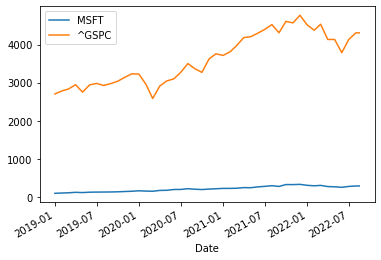

In [30]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [31]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

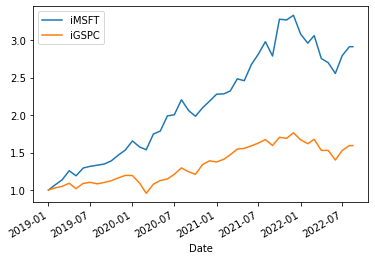

In [32]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [33]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [34]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


<Figure size 432x288 with 0 Axes>

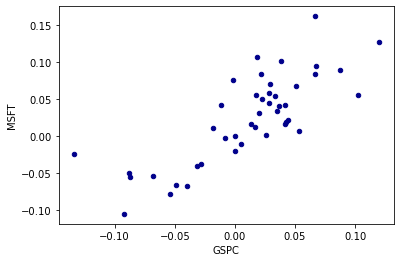

In [35]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

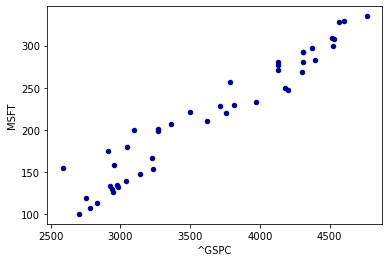

In [36]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

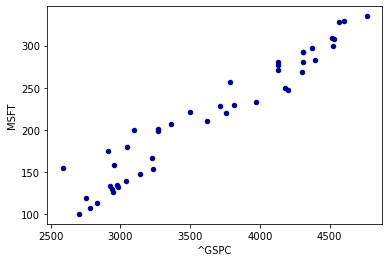

In [37]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

In [38]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.002469534247766499

In [39]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00348395, 0.00246953],
       [0.00246953, 0.00279178]])

In [40]:
cov = covm[0,1]
cov

0.002469534247766499

In [41]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.79184234],
       [0.79184234, 1.        ]])

In [42]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7918423414434584

In [43]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7918423414434586, 1.5450193820270284e-10)